In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# from xgboost import XGBClassifier
# from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, f1_score, roc_curve, confusion_matrix

import matplotlib.pyplot as plt

import seaborn as sns

In [14]:
def train_test_shape(X_train, X_test, y_train, y_test):
    nl = '\n'
    print(f"X_train: {X_train.shape}{nl} X_test: {X_test.shape}{nl} \
    y_train: {y_train.shape}{nl} y_test: {y_test.shape}")

In [15]:
class Mushrooms():
  DATA = './mushroom.csv'
  TARGET = 'class'
  
  def __init__(self) -> None:
    pass

  def import_data(self):
    return pd.read_csv(self.DATA)
  
  def preprocessing(self,df):
    for i in df:
      uniq = df[i].unique()
      new = []
      for j in df[i]:
          new.append(np.where(uniq==j)[0][0])

      df[i] = new
    return df

  def split(self, df):
    y = df[self.TARGET]
    X = df.loc[:, df.columns != self.TARGET]
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
    return X_train, X_test, y_train, y_test


In [16]:
a = Mushrooms()
df = a.preprocessing(a.import_data())
X_train, X_test, y_train, y_test = a.split(df)
train_test_shape(X_train, X_test, y_train, y_test)

X_train: (5443, 22)
 X_test: (2681, 22)
     y_train: (5443,)
 y_test: (2681,)


In [24]:
class MushroomsClassif(Mushrooms):
  
  X_train, X_test, y_train, y_test = a.split(df)
  
#   def aa(self):
#     print(self.X_train)

# dd = MushroomsClassif()
# dd.aa()
  
  def logcl(self):
    clf = LogisticRegression(random_state=24, max_iter = 10).fit(self.X_train, self.y_train)
    return clf

  def cv(self, model):
    scores = cross_val_score(model, self.X_train, self.y_train, cv=5)
    return scores

  def metrics(self, model):
    f1 = f1_score(self.y_test, model.predict(self.X_test))
    roc_auc = roc_auc_score(self.y_test, model.predict_proba(self.X_test)[:, 1])
    nl = '\n'
    return f"F1: {f1}{nl} ROC AUC:{roc_auc} "



In [26]:
mc = MushroomsClassif()
model = mc.logcl()
mc.cv(model) #

/home/oem/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/oem/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

array([0.94214876, 0.94031221, 0.93480257, 0.94393382, 0.95036765])

In [27]:
model = mc.logcl()
print(mc.metrics(model=model))


F1: 0.9358517462580185
 ROC AUC:0.987045079625337 


/home/oem/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


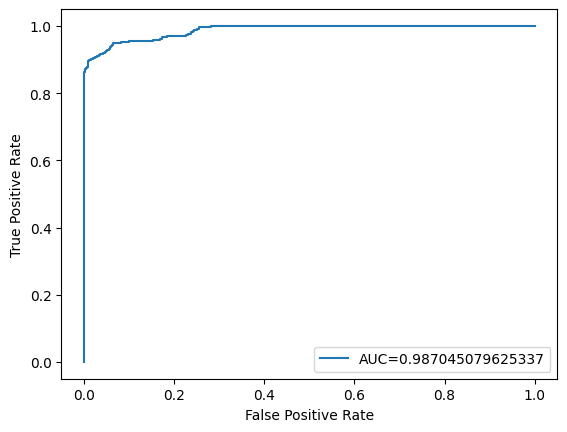

In [19]:
y_pred_proba = model.predict_proba(mc.X_test)[::,1]
fpr, tpr, _ = roc_curve(mc.y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

<AxesSubplot: >

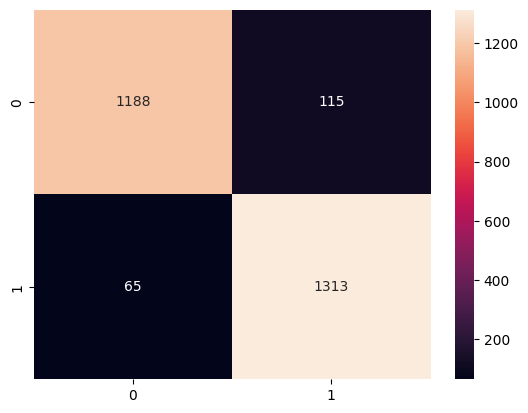

In [29]:
cm = confusion_matrix(mc.y_test, model.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d")